In [1]:
%load_ext autoreload
%autoreload 2

## SHAP links
* https://github.com/slundberg/shap
* http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf
* https://arxiv.org/pdf/1903.02407.pdf
* https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values

In [2]:
import numpy as np
from sklearn.ensemble import IsolationForest
from zwad.ad import fetch_anomalies
import shap

import os.path

In [3]:
isoforest = IsolationForest(max_samples=1000, contamination='auto', n_estimators=1000)

In [4]:
datadir = os.path.join('..', 'data')

oids = np.memmap(os.path.join(datadir, 'oid_m31.dat'), dtype=np.int64)
values = np.memmap(os.path.join(datadir, 'feature_m31.dat'), dtype=np.float32).reshape(oids.size, -1)
names = open(os.path.join(datadir, 'feature_m31.name')).read().split()

In [5]:
np.random.seed(42)
isoforest.n_jobs = 4
isoforest.fit(values)
index = fetch_anomalies(isoforest.score_samples(values), number=40)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


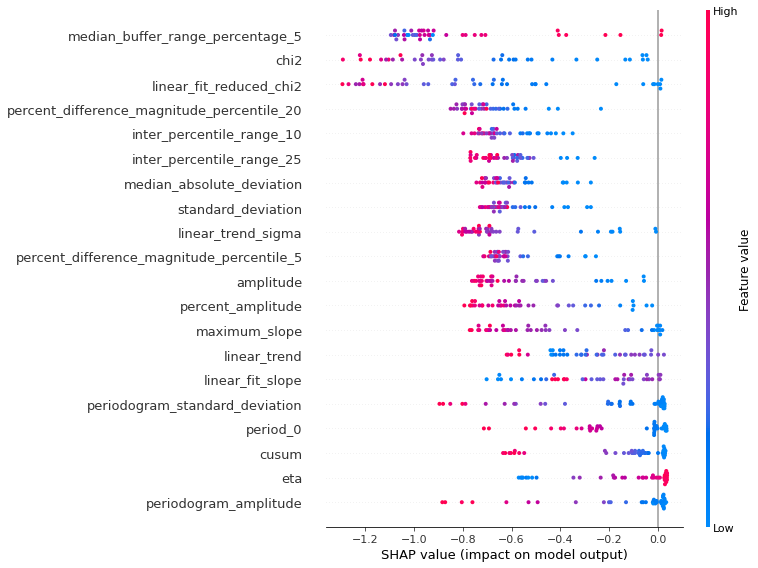

In [7]:
shap_values = shap.TreeExplainer(isoforest).shap_values(values[index])
shap.summary_plot(shap_values, values[index], feature_names=names)